In [68]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

#Library for saving data
import pickle

#other libraries
import pandas as pd
import numpy as np

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [69]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [70]:
print("column names are",df.columns)

print("number of columns are",len(df.columns))

column names are Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')
number of columns are 40


# Data Description

Observations:

1.The dataset has 40 columns

2.There are both categorical and numerical data

3.column names are, 'months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'

# Statistical data analysis

In [71]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,05-08-1992,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,5985 Lincoln Lane,NaN,NaN,?,NaN,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


Observations:

1.There is no column with single unique values

2.Null values is not present as all of them have 1000 datas

3.Outliers are seen in many columns

labels count: 
  N    753
Y    247
Name: fraud_reported, dtype: int64


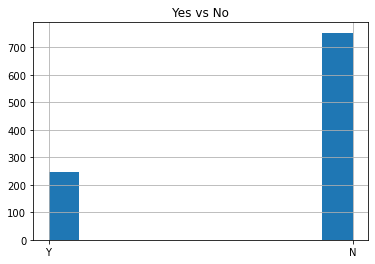

In [72]:
# checking for class imbalance
print("labels count: \n ",df["fraud_reported"].value_counts())

df["fraud_reported"].hist(grid=True)
plt.title("Yes vs No")
plt.show()


class imbalance is present and we would need to balance the class

# Graphical data analysis

In [73]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the label  column
df["fraud_reported"]=lab_enc.fit_transform(df['fraud_reported'])
df["fraud_reported"]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

1 is Yes 

0 is No

In [74]:
# class count
class_count_0, class_count_1 = df['fraud_reported'].value_counts()

#Separate class
class_0 = df[df['fraud_reported'] == 0]
class_1 = df[df['fraud_reported'] == 1]

print('class No/0:', class_0.shape)
print('class Yes/1:', class_1.shape)

class No/0: (753, 40)
class Yes/1: (247, 40)


In [75]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
policy_number                 -0.029443
_c39                                NaN
Name: fraud_reported, dtype: float64

Highest relationship with the label is seen with vehicle_claim ,total_claim_amount and property_claim

# A.Categorical datas

In [76]:
# a.finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


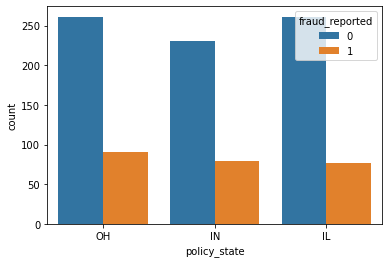

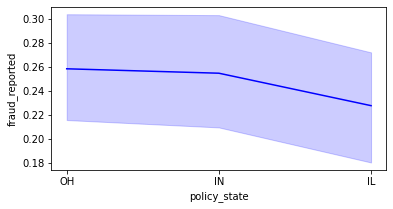

Text(0.5, 1.0, 'policy_state')

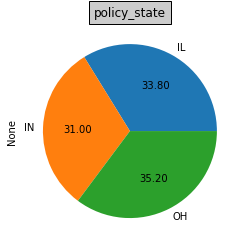

In [77]:
print(df['policy_state'].value_counts())

sns.countplot(x='policy_state', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="policy_state",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('policy_state').size().plot(kind='pie', autopct='%.2f')
plt.title("policy_state",bbox={'facecolor':'0.8', 'pad':5})

1.Highest frauds are seen in OH and least in IH

2.There almost equal customers from OH,IL and IN

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


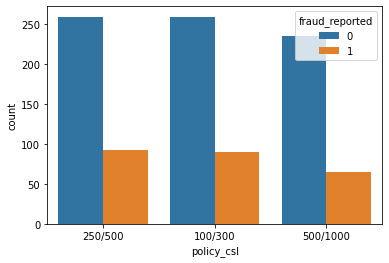

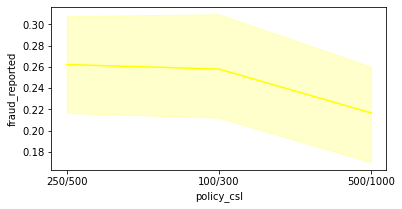

Text(0.5, 1.0, 'policy_csl')

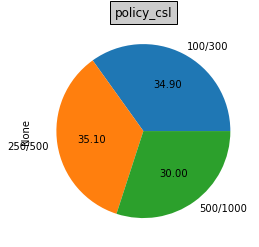

In [78]:
print(df['policy_csl'].value_counts())

sns.countplot(x='policy_csl', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="policy_csl",y="fraud_reported",data=df, color='yellow')
plt.show()


df.groupby('policy_csl').size().plot(kind='pie', autopct='%.2f')
plt.title("policy_csl",bbox={'facecolor':'0.8', 'pad':5})

Combined single limit (CSL):

CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident

1.The CSL has options of 100/300, 500/1000 and 250/500, where the customers have chosen the 250/500 the most

2.The 250/500 and 100/300 have shown higher frauds as compared to 100/300


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


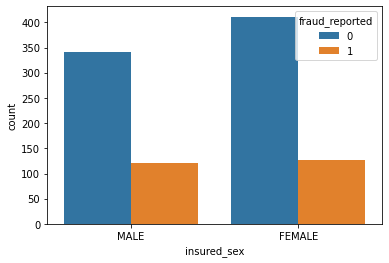

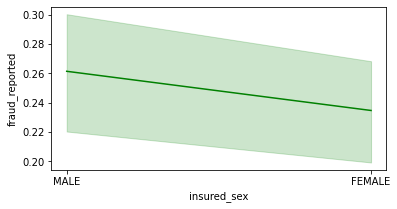

Text(0.5, 1.0, 'insured_sex')

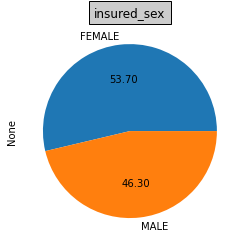

In [79]:
print(df['insured_sex'].value_counts())

sns.countplot(x='insured_sex', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="insured_sex",y="fraud_reported",data=df, color='green')
plt.show()


df.groupby('insured_sex').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_sex",bbox={'facecolor':'0.8', 'pad':5})

1. There is larger number of females among the customers 

2. Males have shown a higher number of frauds

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


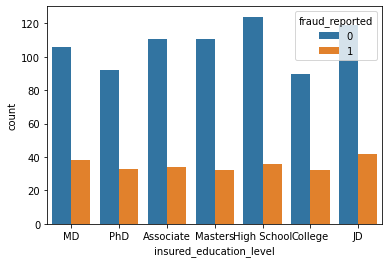

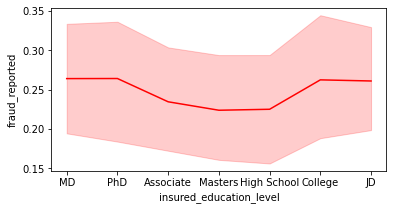

Text(0.5, 1.0, 'insured_education_level')

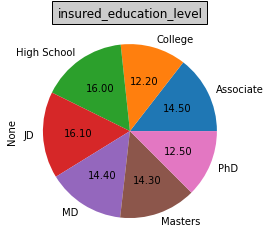

In [80]:
print(df['insured_education_level'].value_counts())

sns.countplot(x='insured_education_level', hue='fraud_reported',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="insured_education_level",y="fraud_reported",data=df, color='red')
plt.show()


df.groupby('insured_education_level').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_education_level",bbox={'facecolor':'0.8', 'pad':5})

1.There is highest number of customers are high school graduates and None

2.Highest percentage of frauds are shown by JD, MD and High school

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


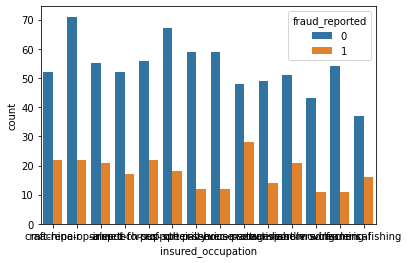

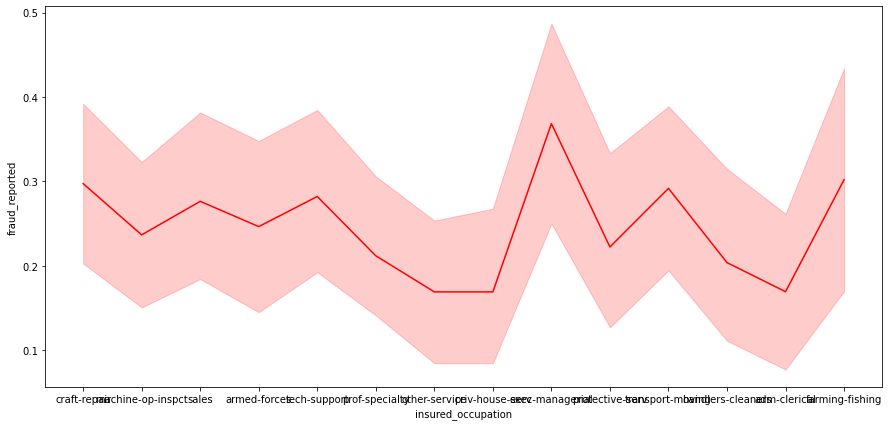

Text(0.5, 1.0, 'insured_occupation')

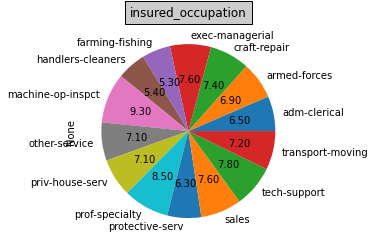

In [81]:
print(df['insured_occupation'].value_counts())

sns.countplot(x='insured_occupation', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(15,7))
sns.lineplot(x="insured_occupation",y="fraud_reported",data=df, color='red')
plt.show()


df.groupby('insured_occupation').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_occupation",bbox={'facecolor':'0.8', 'pad':5})

The largest number of customers are machine operating inspectors and the exec managerial have shown the highest fraud detection

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


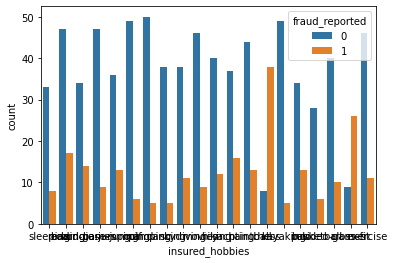

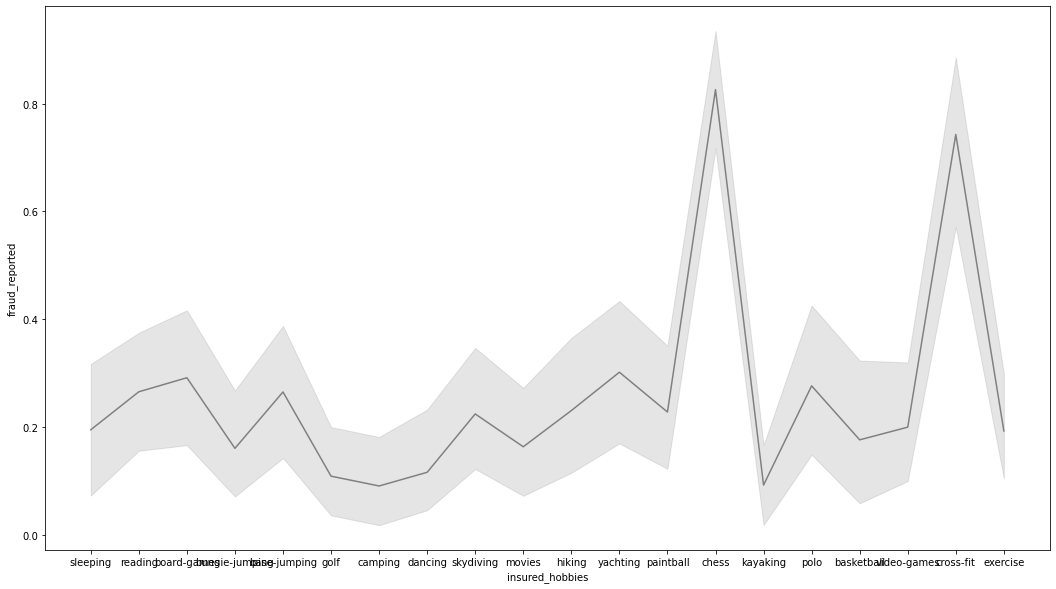

Text(0.5, 1.0, 'insured_hobbies')

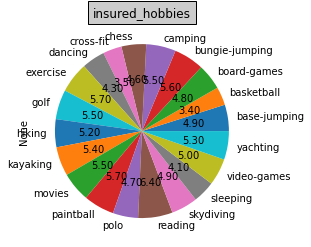

In [82]:
print(df['insured_hobbies'].value_counts())

sns.countplot(x='insured_hobbies', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(18,10))
sns.lineplot(x="insured_hobbies",y="fraud_reported",data=df, color='grey')
plt.show()


df.groupby('insured_hobbies').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_hobbies",bbox={'facecolor':'0.8', 'pad':5})

Customers with hobbies chess and corss fit have shown highest fraud detection

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


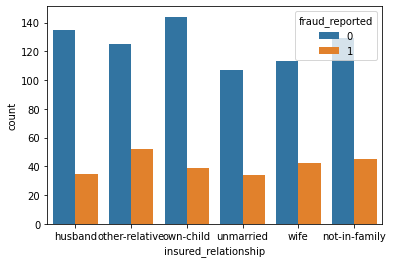

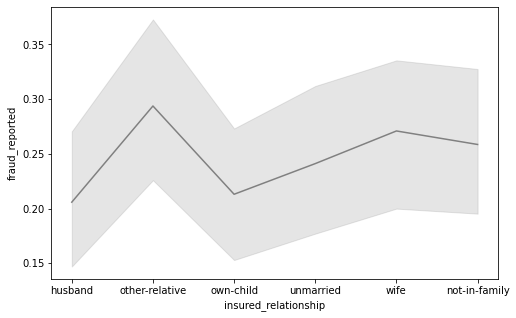

Text(0.5, 1.0, 'insured_relationship')

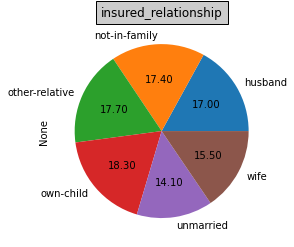

In [83]:
print(df['insured_relationship'].value_counts())

sns.countplot(x='insured_relationship', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="insured_relationship",y="fraud_reported",data=df, color='grey')
plt.show()


df.groupby('insured_relationship').size().plot(kind='pie', autopct='%.2f')
plt.title("insured_relationship",bbox={'facecolor':'0.8', 'pad':5})

1.A code indicating the relationship of the patient to the identified insured is the insured_relationship

2.The highest number of customers were having the insured relationship to be own child

3.The highest frauds were seen where the insured relationship was other relative

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


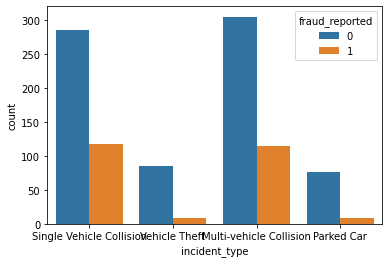

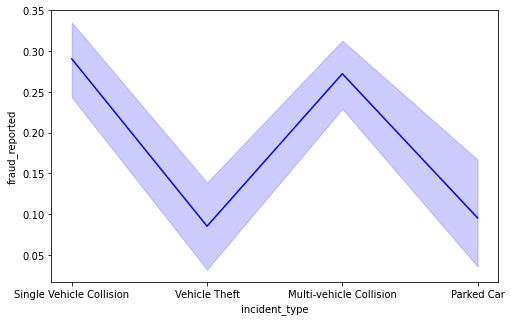

Text(0.5, 1.0, 'incident_type')

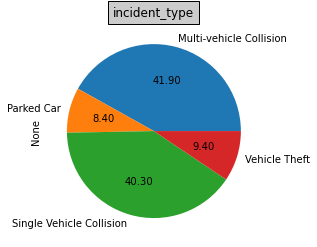

In [84]:
print(df['incident_type'].value_counts())

sns.countplot(x='incident_type', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_type",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_type').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_type",bbox={'facecolor':'0.8', 'pad':5})

1.Highest number of customers faced Multi vehicle collision, followed by single vehicle collision

2.Single vehicle and multi vehicle collision have shown the highest Frauds reported

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


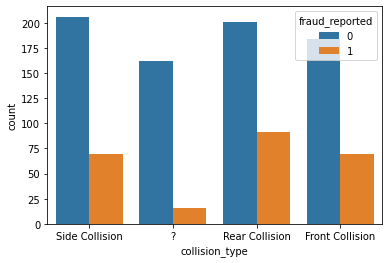

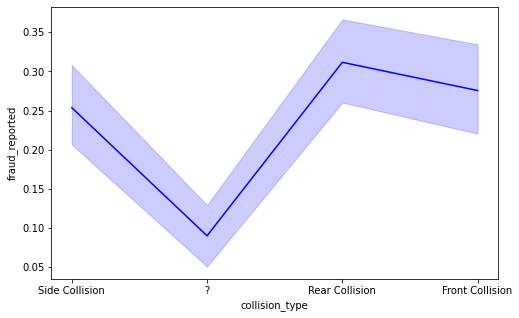

Text(0.5, 1.0, 'collision_type')

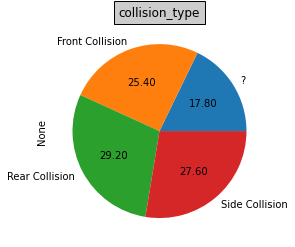

In [85]:
print(df['collision_type'].value_counts())

sns.countplot(x='collision_type', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="collision_type",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('collision_type').size().plot(kind='pie', autopct='%.2f')
plt.title("collision_type",bbox={'facecolor':'0.8', 'pad':5})

Rear and side collission has been the highest where the rear collission has shown the highest frauds

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


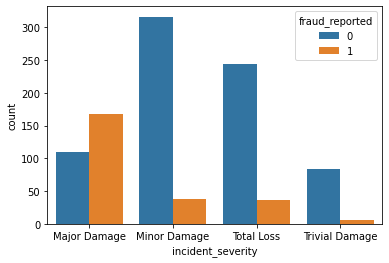

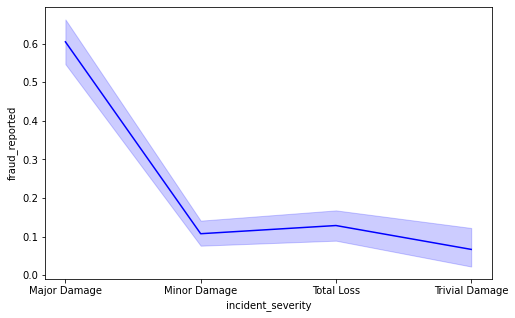

Text(0.5, 1.0, 'incident_severity')

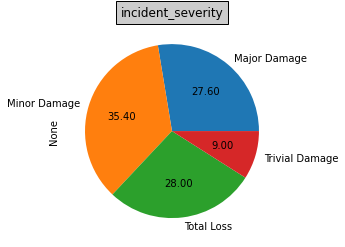

In [86]:
print(df['incident_severity'].value_counts())

sns.countplot(x='incident_severity', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_severity",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_severity').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_severity",bbox={'facecolor':'0.8', 'pad':5})

The highest number of customers faced minor damages, but the customers with major damages were the ones who were reported to be fraud

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


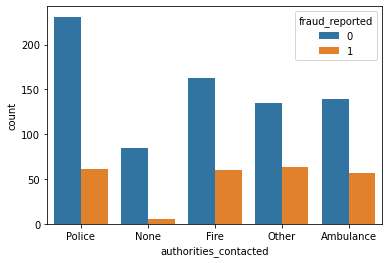

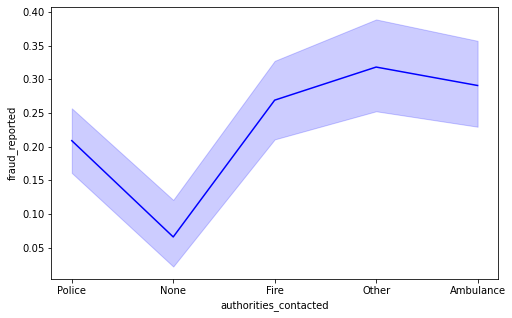

Text(0.5, 1.0, 'authorities_contacted')

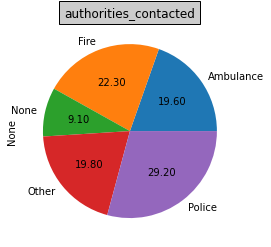

In [87]:
print(df['authorities_contacted'].value_counts())

sns.countplot(x='authorities_contacted', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="authorities_contacted",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('authorities_contacted').size().plot(kind='pie', autopct='%.2f')
plt.title("authorities_contacted",bbox={'facecolor':'0.8', 'pad':5})

The highest frauds were reported by police, but the highest percentage of fraud among those reported were by OthersPolice reported cases shows lower frauds compared to those reported by police

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


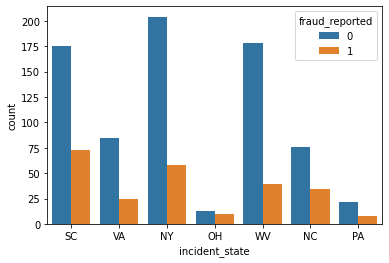

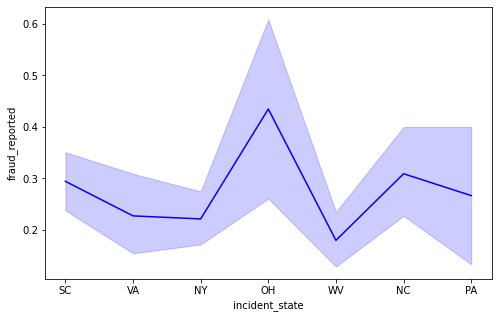

Text(0.5, 1.0, 'incident_state')

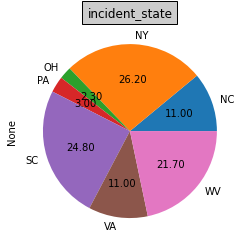

In [88]:
print(df['incident_state'].value_counts())

sns.countplot(x='incident_state', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_state",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_state').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_state",bbox={'facecolor':'0.8', 'pad':5})

Highest incident state was SC

the highest fraud detected were from SC

The highest percentage of those detected were from OH

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


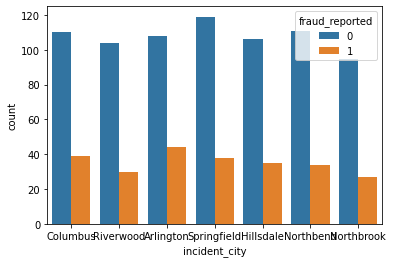

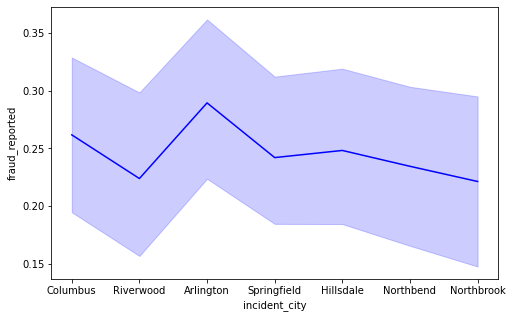

Text(0.5, 1.0, 'incident_city')

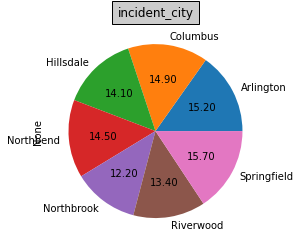

In [89]:
print(df['incident_city'].value_counts())

sns.countplot(x='incident_city', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="incident_city",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('incident_city').size().plot(kind='pie', autopct='%.2f')
plt.title("incident_city",bbox={'facecolor':'0.8', 'pad':5})

1. Largest number of customers were from Arlington and springfield

2.Largest percentage of frauds reported were from arlington

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


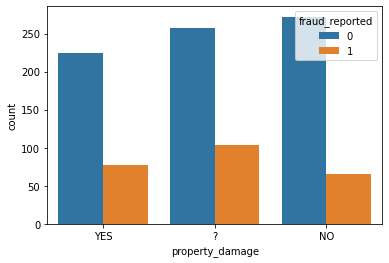

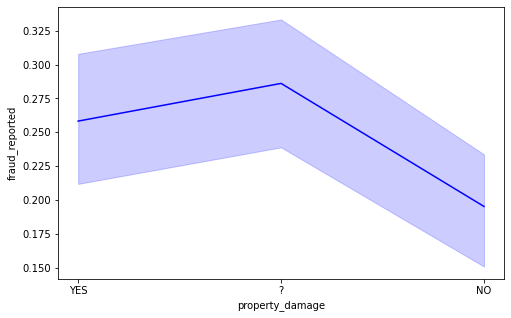

Text(0.5, 1.0, 'property_damage')

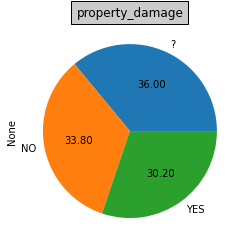

In [90]:
print(df['property_damage'].value_counts())

sns.countplot(x='property_damage', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="property_damage",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('property_damage').size().plot(kind='pie', autopct='%.2f')
plt.title("property_damage",bbox={'facecolor':'0.8', 'pad':5})

Largest is an unamed data 

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


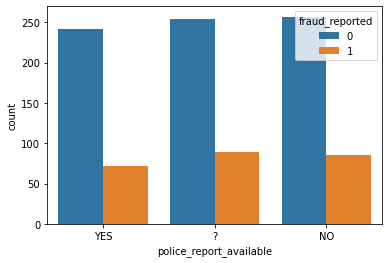

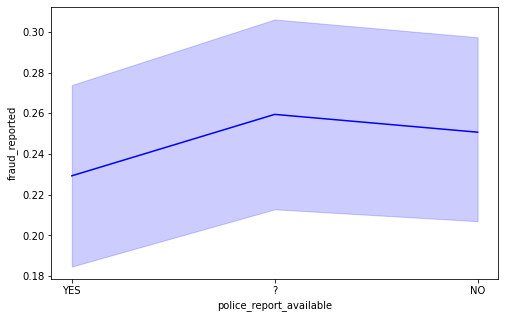

Text(0.5, 1.0, 'police_report_available')

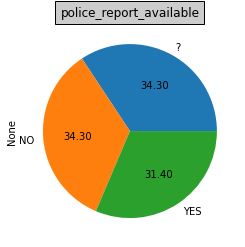

In [91]:
print(df['police_report_available'].value_counts())

sns.countplot(x='police_report_available', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="police_report_available",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('police_report_available').size().plot(kind='pie', autopct='%.2f')
plt.title("police_report_available",bbox={'facecolor':'0.8', 'pad':5})

Largest is unamed data

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


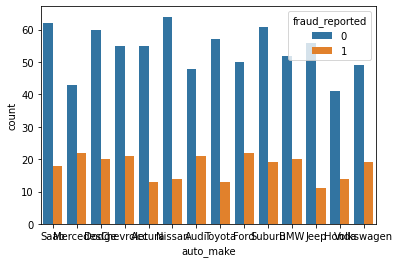

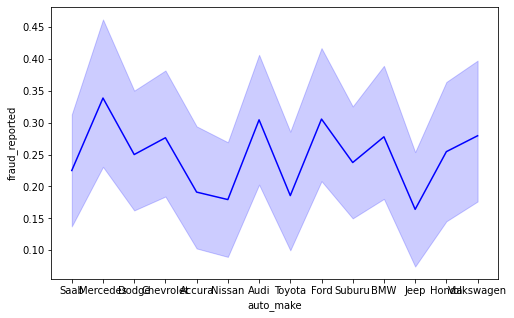

Text(0.5, 1.0, 'auto_make')

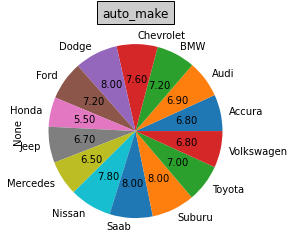

In [92]:
print(df['auto_make'].value_counts())

sns.countplot(x='auto_make', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(8,5))
sns.lineplot(x="auto_make",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('auto_make').size().plot(kind='pie', autopct='%.2f')
plt.title("auto_make",bbox={'facecolor':'0.8', 'pad':5})

The largest frauds are done by customers with Saab

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
95                27
E400              27
F150              27
Grand Cherokee    25
93                25
Tahoe             24
Maxima            24
Escape            24
X5                23
Ultima            23
Silverado         22
Civic             22
Highlander        22
Fusion            21
CRV               20
ML350             20
TL                20
Impreza           20
Corolla           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


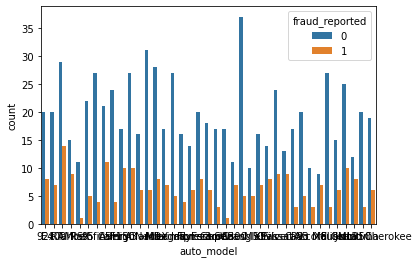

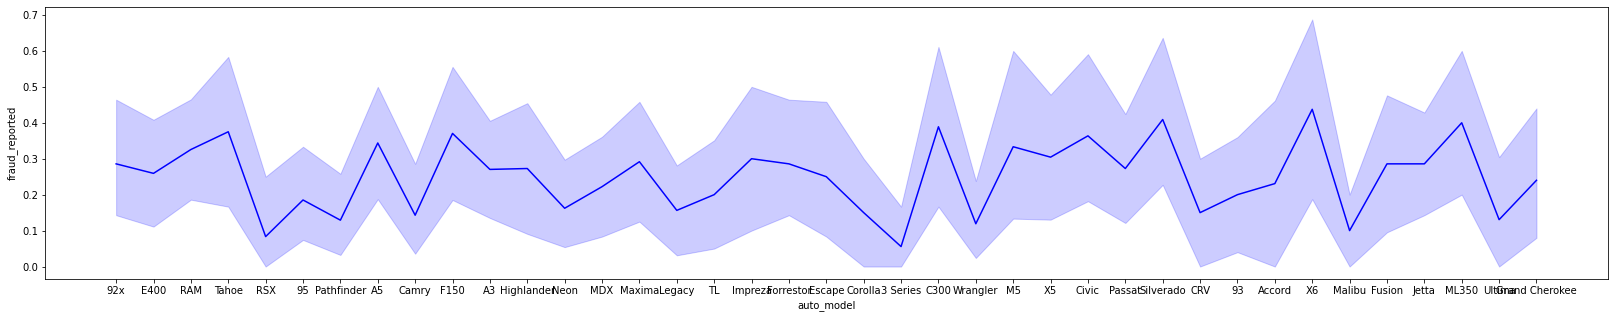

Text(0.5, 1.0, 'auto_model')

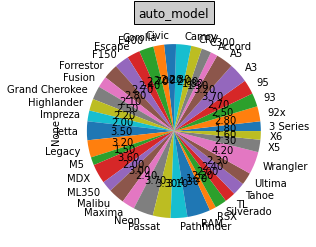

In [93]:
print(df['auto_model'].value_counts())

sns.countplot(x='auto_model', hue='fraud_reported',data = df,dodge=True)

plt.figure(figsize=(28,5))
sns.lineplot(x="auto_model",y="fraud_reported",data=df, color='blue')
plt.show()


df.groupby('auto_model').size().plot(kind='pie', autopct='%.2f')
plt.title("auto_model",bbox={'facecolor':'0.8', 'pad':5})

Largest frauds are done by X6 auto model

# Numerical values

In [94]:
df.select_dtypes(include=["number"]).columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [95]:
num=df[{"months_as_customer", "age", "policy_number", "policy_deductable","policy_annual_premium", "umbrella_limit","capital-gains", "capital-loss", "incident_hour_of_the_day","number_of_vehicles_involved", "bodily_injuries", "witnesses","total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"}]

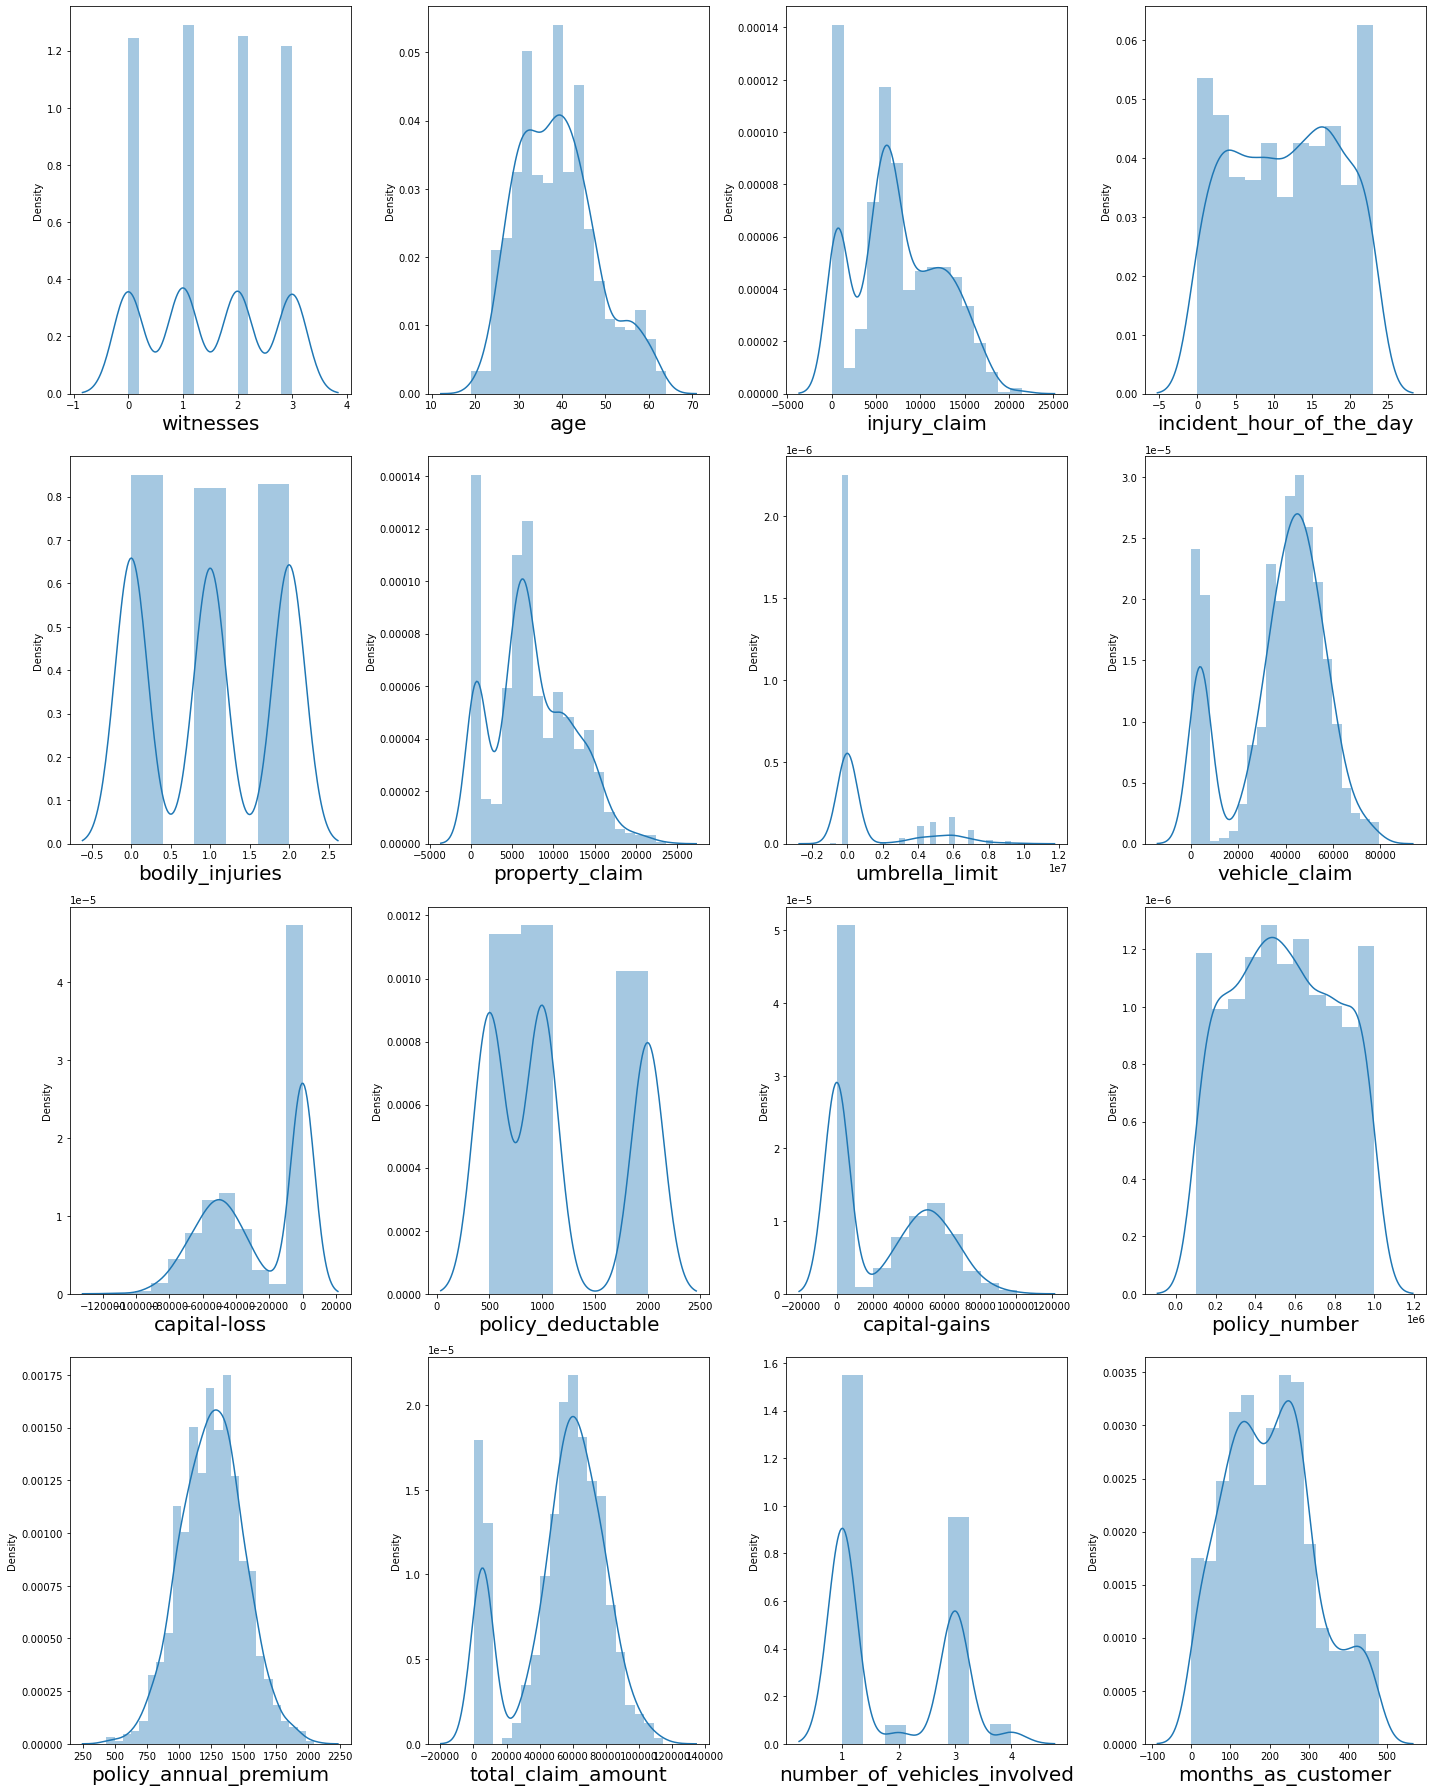

In [96]:
#understanding relationship between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

Observations:

1.Age group highest is 40years  

2.Customers mostly have 1 vehicle

3.Mostly people are 100-300 months as customers

4.claims heighest are:
  
  a.injury claim(excluding outliers):rs5000
  
  b.vehicle claim(excluding outliers):rs40000
  
  c.property claim(excluding outliers): rs40000

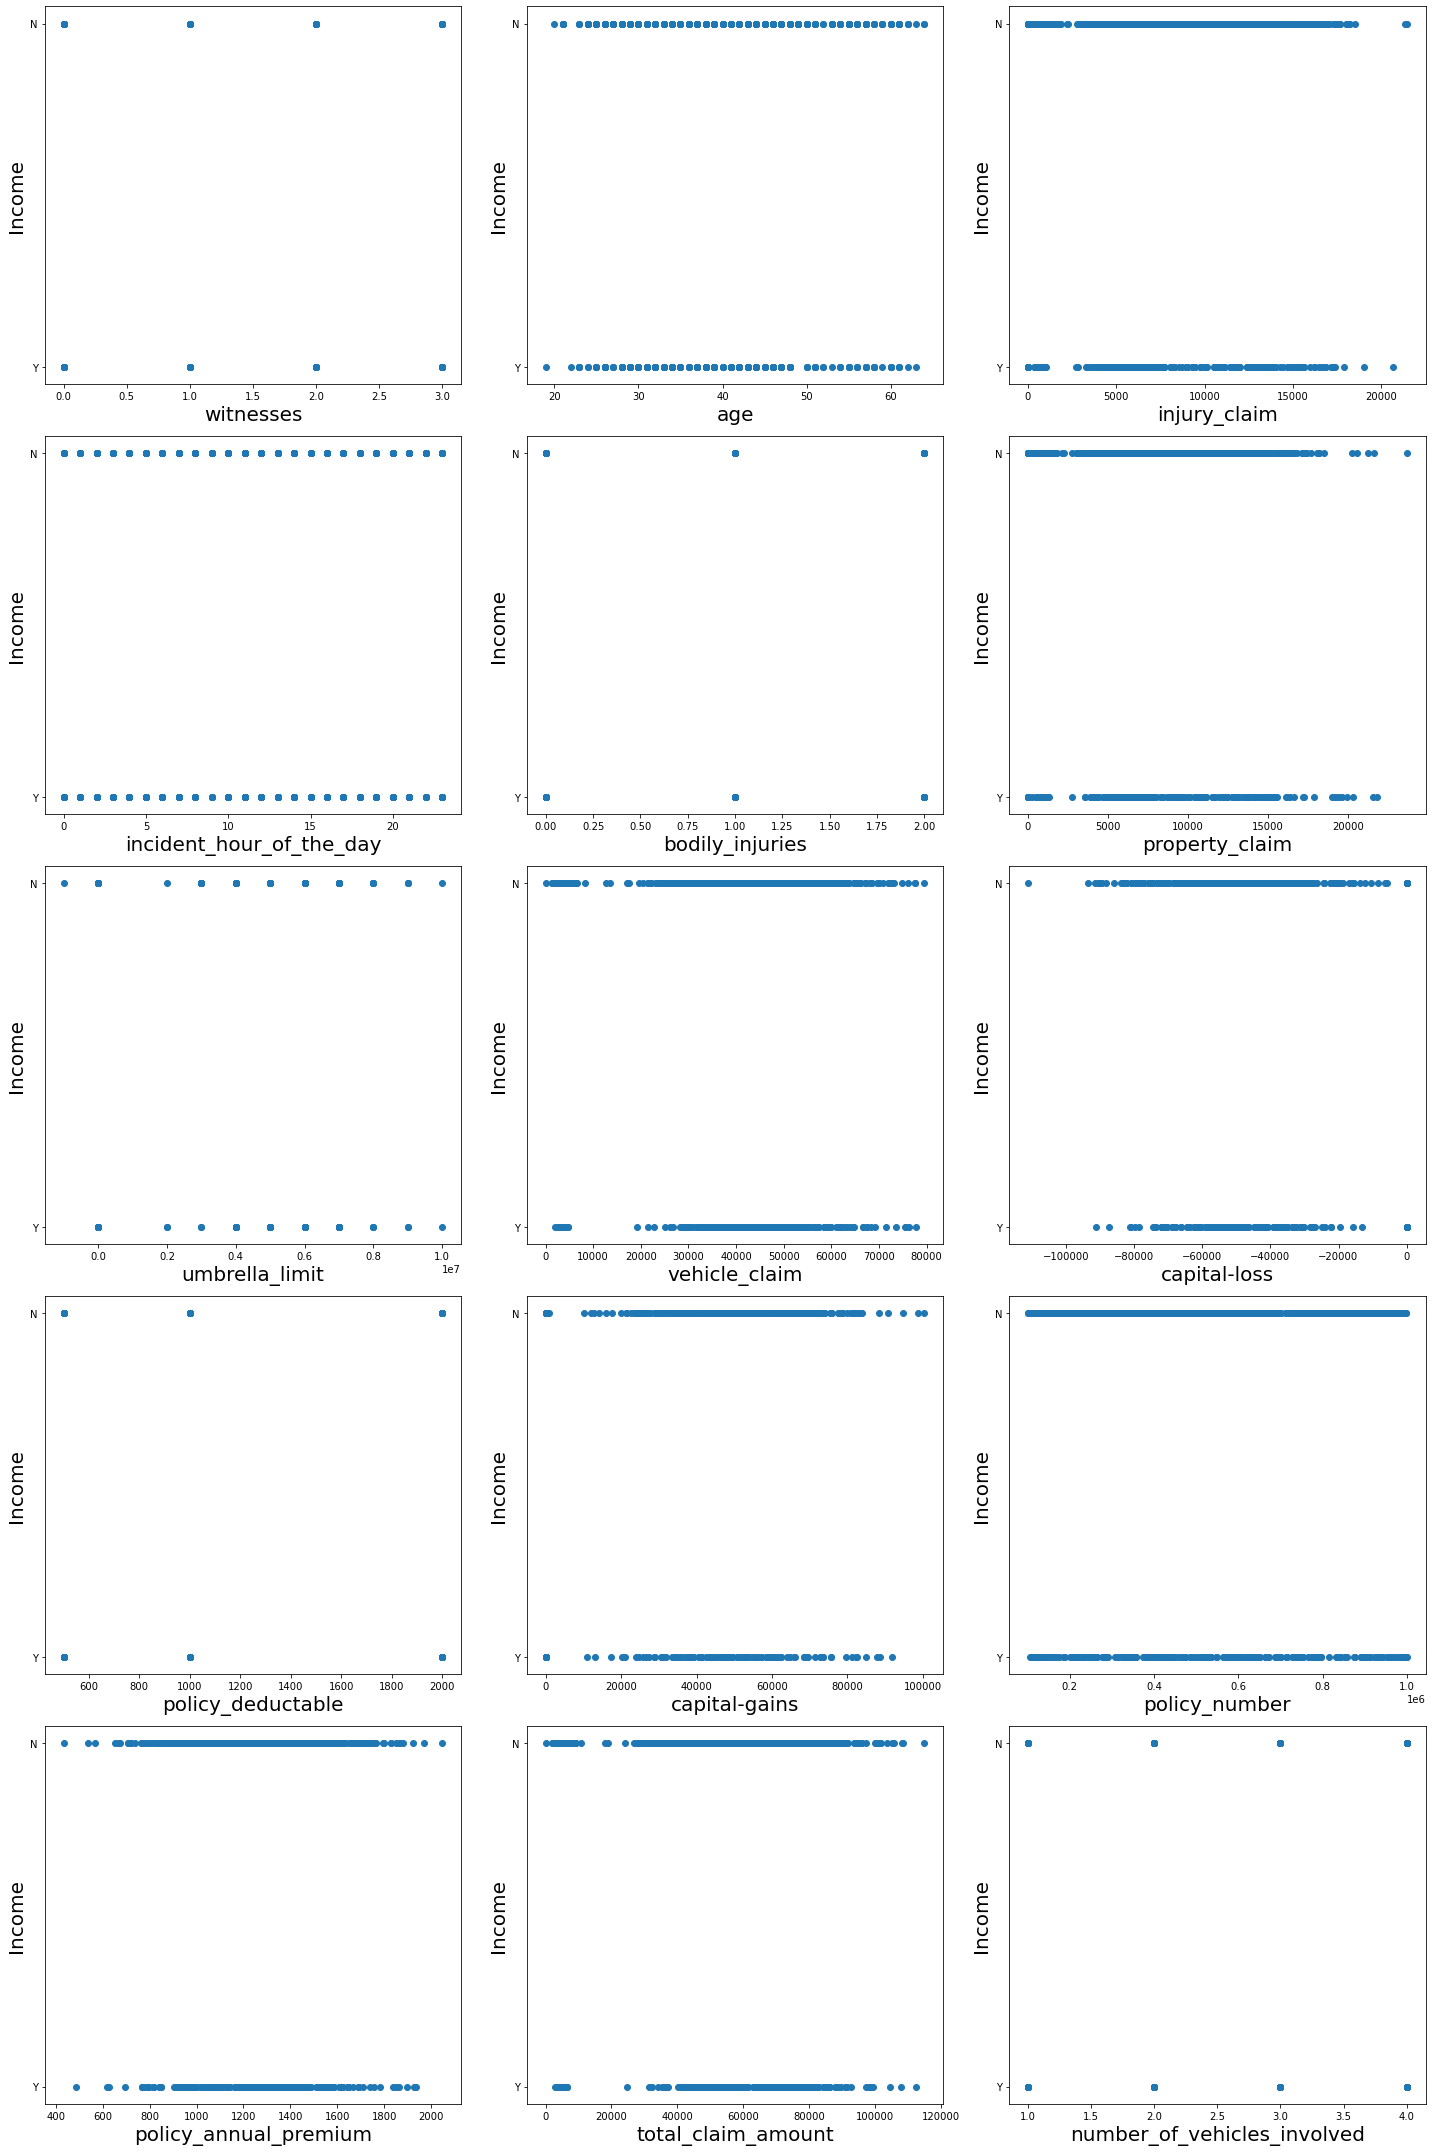

In [97]:
df1=df=pd.read_csv('Automobile_insurance_fraud.csv')
y_table=df1["fraud_reported"]

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

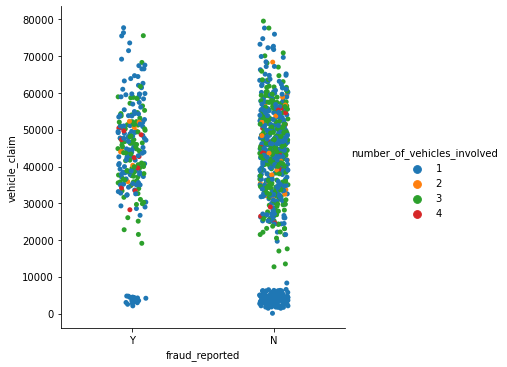

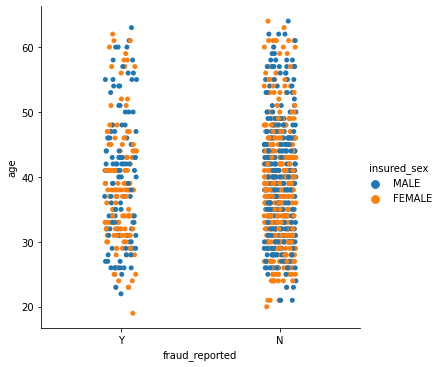

In [98]:
sns.catplot(x="fraud_reported", y="vehicle_claim",hue="number_of_vehicles_involved", data=df1)

sns.catplot(x="fraud_reported", y="age",hue="insured_sex",data=df1)


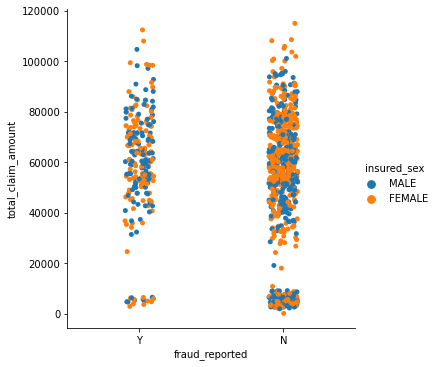

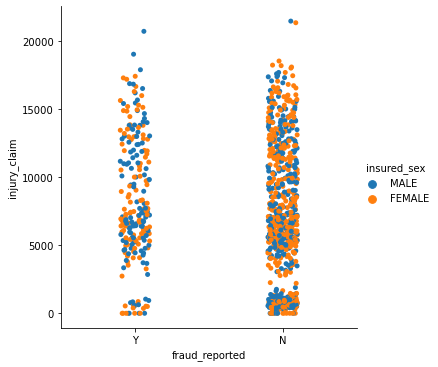

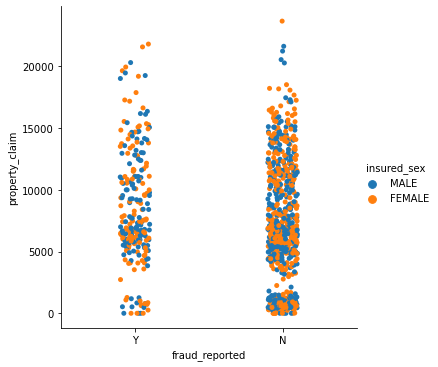

In [99]:
#claims
sns.catplot(x="fraud_reported", y="total_claim_amount",hue="insured_sex", data=df1)

sns.catplot(x="fraud_reported", y="injury_claim",hue="insured_sex", data=df1)

sns.catplot(x="fraud_reported", y="property_claim",hue="insured_sex", data=df1)

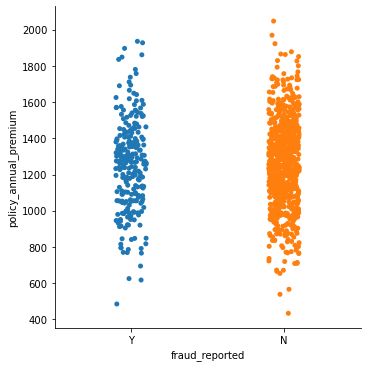

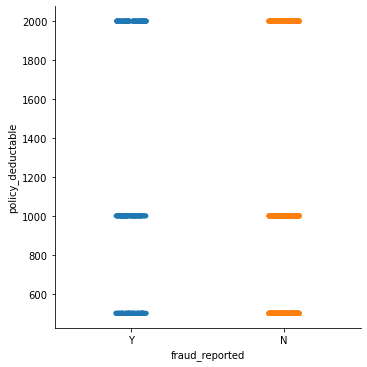

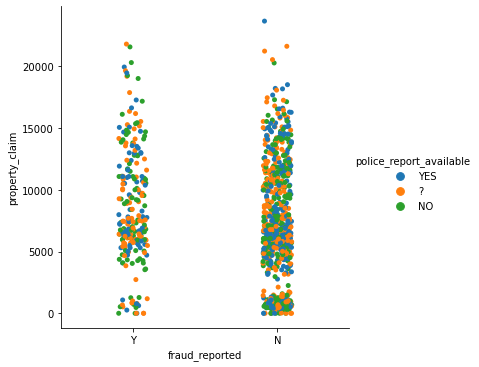

In [100]:
#policy annual premium and policy deductible
sns.catplot(x="fraud_reported", y="policy_annual_premium", data=df1)

sns.catplot(x="fraud_reported", y="policy_deductable", data=df1)

sns.catplot(x="fraud_reported", y="property_claim",hue="police_report_available", data=df1)

Observation:

1.1 and 3 vehicles, between rs3000 and rs6000 of vehicle claims have been detected for fraud

2.Rs5000 to rs6000 for injury claim have been highest to detect fraud

3.Both male and female, between ages 30 to 48 have been highest to detect fraud



# Feature Engineering

In [101]:
print(df['collision_type'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


In [102]:
#renaming ?
df["collision_type"] = df.collision_type.replace('?', 'Unknown variable')

In [103]:
print(df['property_damage'].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


In [104]:
#renaming ?
df["property_damage"] = df.collision_type.replace('?', 'Yes/No')

In [105]:
print(df['police_report_available'].value_counts())

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


In [106]:
#renaming ?
df["police_report_available"] = df.collision_type.replace('?', 'Yes/No')

In [107]:
#incident_location has 1000 unique values hence dropping it
df.drop(["incident_location"], axis=1,inplace=True)

In [108]:
#breaking down dates
#extracting Date into more usable format
df["day_policy"] = pd.to_datetime(df["policy_bind_date"], format="%d-%m-%Y").dt.day
df["month_policy"] = pd.to_datetime(df["policy_bind_date"], format = "%d-%m-%Y").dt.month
df["year_policy"] = pd.to_datetime(df["policy_bind_date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["policy_bind_date"], axis = 1, inplace = True)

In [109]:
#breaking down dates
#extracting Date into more usable format
df["day_incident"] = pd.to_datetime(df["incident_date"], format="%d-%m-%Y").dt.day
df["month_incident"] = pd.to_datetime(df["incident_date"], format = "%d-%m-%Y").dt.month
df["year_incident"] = pd.to_datetime(df["incident_date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["incident_date"], axis = 1, inplace = True)

In [110]:
#Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available     

In [111]:
#dropping_c39 as its fully null values
df.drop(["_c39"], axis=1,inplace=True)

In [112]:
#policy state has 951 unique values, so dropping it
df.drop(["policy_state"], axis=1,inplace=True)

# EDA

# 1.Dealing with continous data

In [113]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [114]:
#Categorical data
df.select_dtypes(exclude=["number"]).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [115]:
#numerical data
df.select_dtypes(include=["number"]).columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'day_policy', 'month_policy', 'year_policy',
       'day_incident', 'month_incident', 'year_incident'],
      dtype='object')

In [116]:
num=df[{"months_as_customer", "age", "policy_number", "policy_deductable","policy_annual_premium", "umbrella_limit","capital-gains", "capital-loss", "incident_hour_of_the_day","number_of_vehicles_involved", "bodily_injuries", "witnesses","total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"}]
y=df["fraud_reported"]

In [117]:
num

,witnesses,age,injury_claim,incident_hour_of_the_day,bodily_injuries,property_claim,umbrella_limit,vehicle_claim,capital-loss,policy_deductable,capital-gains,policy_number,policy_annual_premium,total_claim_amount,number_of_vehicles_involved,months_as_customer
0,2,48,6510,5,1,13020,0,52080,0,1000,53300,521585,1406.91,71610,1,328
1,0,42,780,8,0,780,5000000,3510,0,2000,0,342868,1197.22,5070,1,228
2,3,29,7700,7,2,3850,5000000,23100,0,2000,35100,687698,1413.14,34650,3,134
3,2,41,6340,5,1,6340,6000000,50720,-62400,2000,48900,227811,1415.74,63400,1,256
4,1,44,1300,20,0,650,6000000,4550,-46000,1000,66000,367455,1583.91,6500,1,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,38,17440,20,0,8720,0,61040,0,1000,0,941851,1310.80,87200,1,3
996,3,41,18080,23,2,18080,0,72320,0,1000,70900,186934,1436.79,108480,1,285
997,3,34,7500,4,2,7500,3000000,52500,0,500,35100,918516,1383.49,67500,3,130
998,1,62,5220,2,0,5220,5000000,36540,0,2000,0,533940,1356.92,46980,1,458


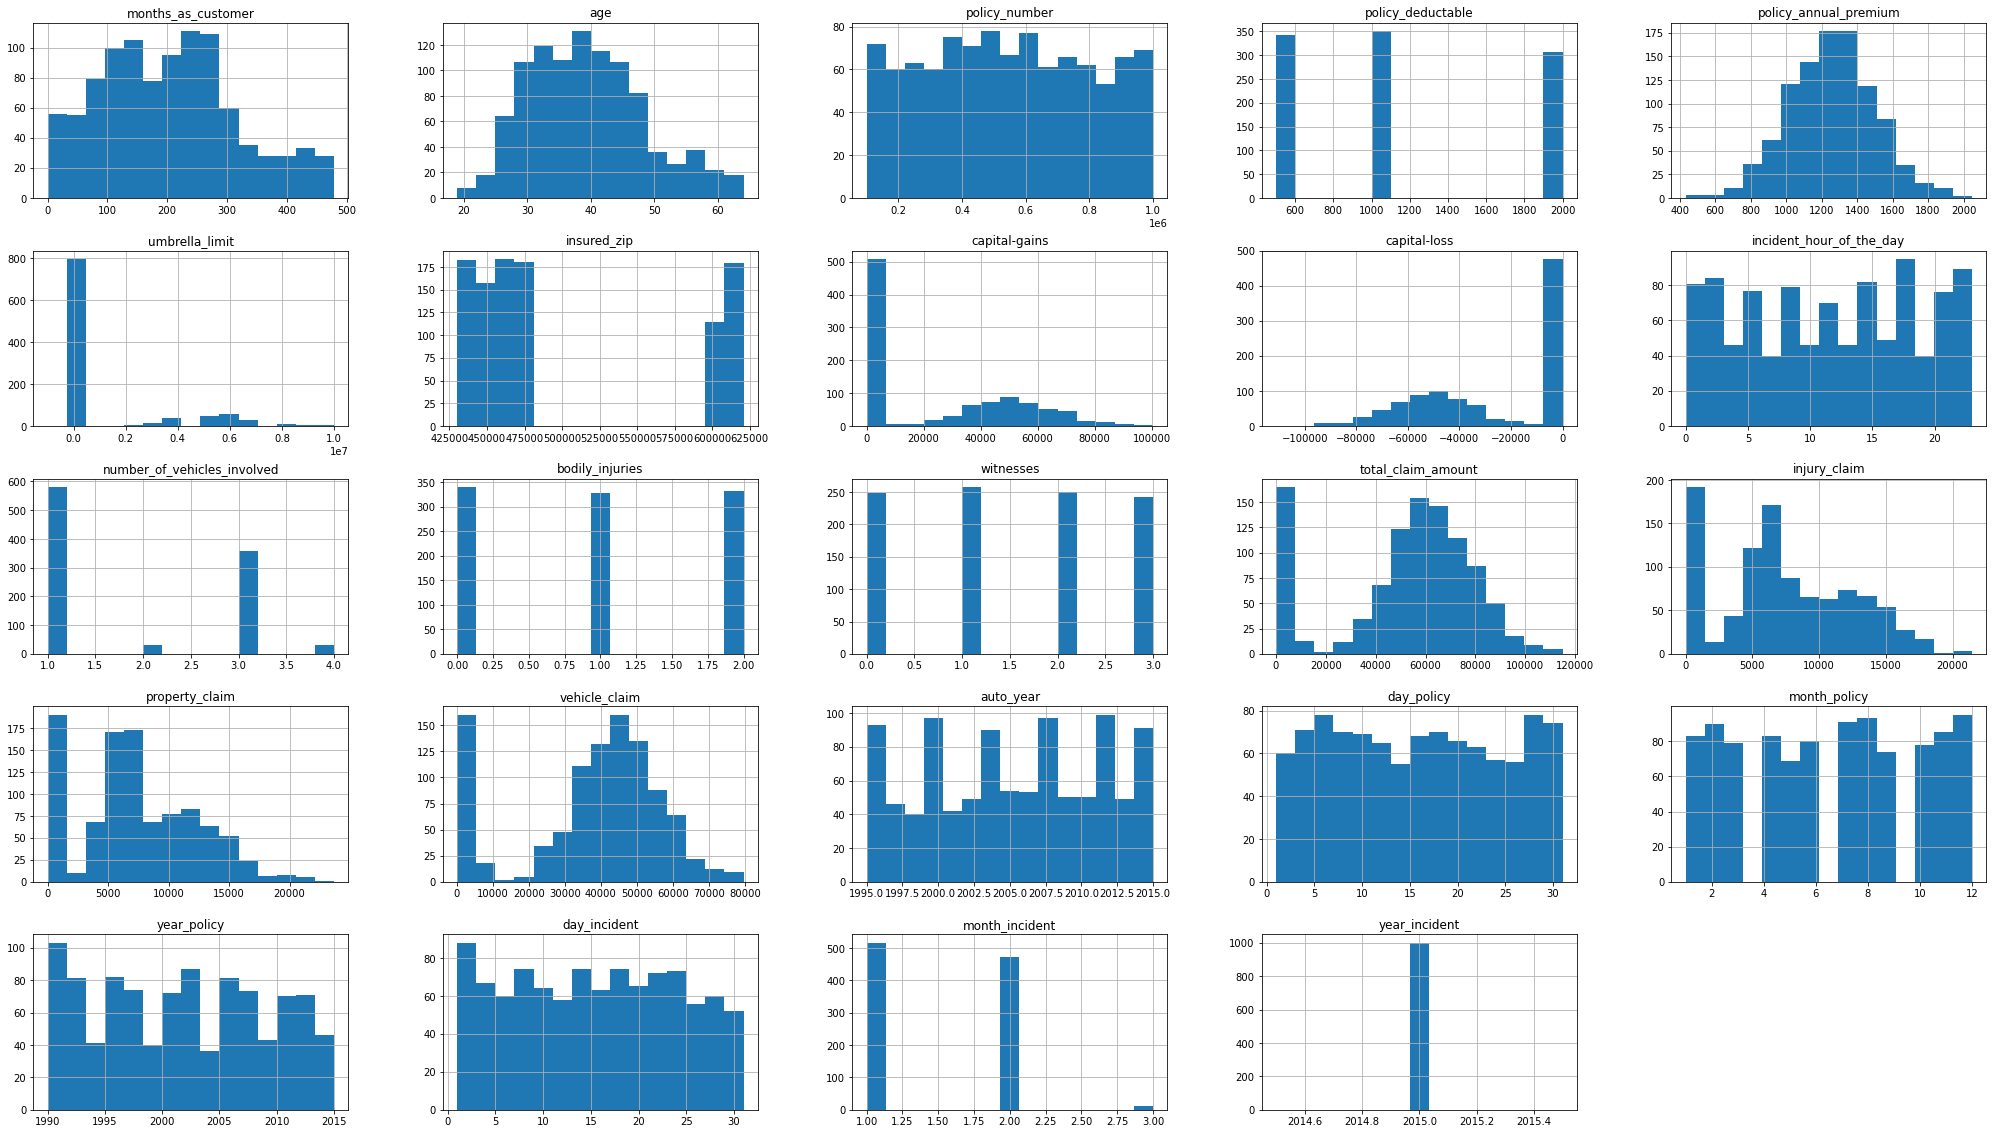

In [118]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [119]:
#removing outliers

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  1000
columns after applying zscore:  980


In [120]:
df=df_new

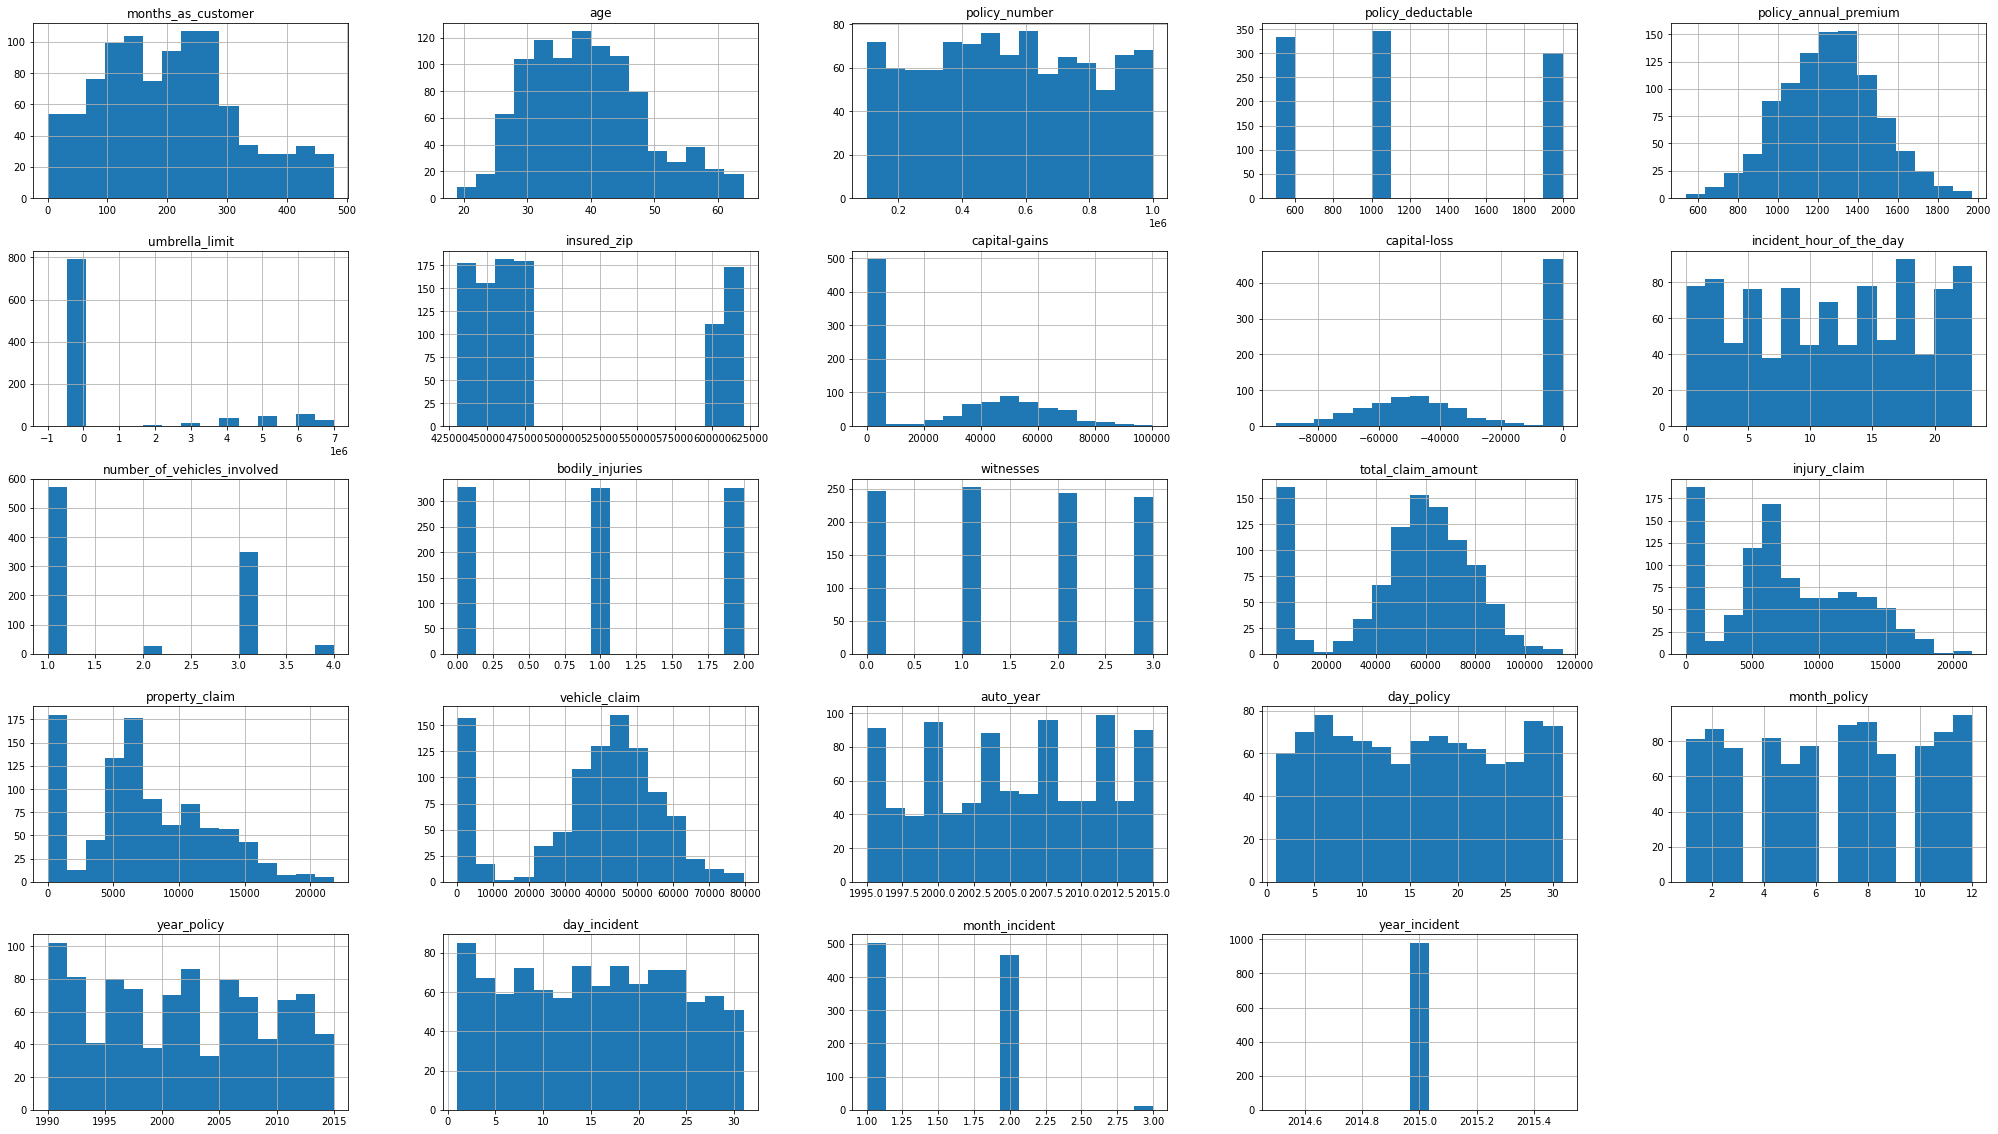

In [121]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()



In [122]:
num=df[{"months_as_customer", "age", "policy_number", "policy_deductable","policy_annual_premium", "umbrella_limit","capital-gains", "capital-loss", "incident_hour_of_the_day","number_of_vehicles_involved", "bodily_injuries", "witnesses","total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"}]
y=df["fraud_reported"]

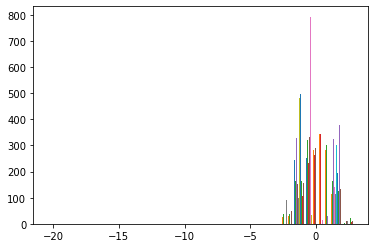

In [123]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(num)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

In [124]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform

df_new=power_transform(num)

x_new=pd.DataFrame(df_new,columns=num.columns)

#checking skewness
x_new.skew()

witnesses                     -0.151669
age                           -0.002183
injury_claim                  -0.416732
incident_hour_of_the_day      -0.258027
bodily_injuries               -0.133824
property_claim                -0.357397
umbrella_limit                -7.932397
vehicle_claim                 -0.521805
capital-loss                   0.088750
policy_deductable              0.022179
capital-gains                  0.031294
policy_number                 -0.161791
policy_annual_premium         -0.007258
total_claim_amount            -0.508540
number_of_vehicles_involved    0.372833
months_as_customer            -0.133972
dtype: float64

In [125]:
x_new

,witnesses,age,injury_claim,incident_hour_of_the_day,bodily_injuries,property_claim,umbrella_limit,vehicle_claim,capital-loss,policy_deductable,capital-gains,policy_number,policy_annual_premium,total_claim_amount,number_of_vehicles_involved,months_as_customer
0,0.523536,1.002330,0.008582,-0.916935,0.094895,1.089802,-0.337086,0.758130,1.048516,0.063154,1.028989,-0.023475,0.623999,0.720163,-0.839387,1.044541
1,-1.406436,0.427171,-1.522095,-0.447636,-1.264943,-1.563723,1.482455,-1.787485,1.048516,1.271808,-0.986627,-0.744012,-0.241075,-1.778146,-0.839387,0.299045
2,1.292411,-1.136013,0.226178,-0.599018,1.177809,-0.582075,1.482455,-0.820246,1.048516,1.271808,0.955106,0.586805,0.649541,-0.715924,1.194880,-0.515819
3,0.523536,0.324015,-0.023878,-0.916935,0.094895,-0.036218,1.788485,0.681832,-1.006291,1.271808,1.013773,-1.263442,0.660199,0.395030,-0.839387,0.517526
4,-0.348068,0.626869,-1.300517,1.144669,-1.264943,-1.628274,1.788485,-1.740862,-0.941672,0.063154,1.066686,-0.639686,1.346451,-1.730904,-0.839387,0.299045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-0.348068,0.000032,1.636206,1.144669,-1.264943,0.405145,-0.337086,1.265008,1.048516,0.063154,-0.986627,1.447872,0.228826,1.344950,-0.839387,-2.293459
976,1.292411,0.324015,1.714545,1.501769,1.177809,1.782279,-0.337086,1.912437,1.048516,0.063154,1.079302,-1.464396,0.746426,2.210977,-0.839387,0.735268
977,1.292411,-0.470598,0.190694,-1.085544,1.177809,0.186254,0.839984,0.781728,1.048516,-1.215211,0.955106,1.371726,0.527900,0.557034,1.194880,-0.554272
978,-0.348068,2.121075,-0.248074,-1.451402,-1.264943,-0.267909,1.482455,-0.102017,1.048516,1.271808,-0.986627,0.023579,0.418724,-0.245515,-0.839387,1.904088


If score is low, we will add this power transform

# 2. Dealing with categorical data

In [126]:
# a.finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

# b.Undersampling and oversampling

In [127]:
df['fraud_reported'].value_counts()

N    740
Y    240
Name: fraud_reported, dtype: int64

In [128]:
#performing undersampling
from sklearn.utils import resample

No = df[df.fraud_reported==0]
Yes = df[df.fraud_reported==1]

# downsample majority
no_downsampled = resample(No,
                        replace = False, # sample without replacement
                         n_samples = len(Yes), # match minority n
                        random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled,Yes])

# checking counts
downsampled.fraud_reported.value_counts()

Series([], Name: fraud_reported, dtype: int64)

using downsampled accuracy less

# c.Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the label  column
df["fraud_reported"]=lab_enc.fit_transform(df['fraud_reported'])
df["fraud_reported"]

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [130]:
x=df.drop(["fraud_reported"],axis=1)

#one hot encoding on data
x=pd.get_dummies(x)
x

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,day_policy,month_policy,year_policy,day_incident,month_incident,year_incident,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_Unknown variable,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_Front Collision,property_damage_Rear Collision,property_damage_Side Collision,property_damage_Unknown variable,police_report_available_Front Collision,police_report_available_Rear Collision,police_report_available_Side Collision,police_report_available_Unknown variable,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,17,10,2014,25,1,2015,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [131]:
x.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
      dtype='object', length=168)

In [132]:
len(x)

980

In [133]:
len(y)

980

# Feature Selection

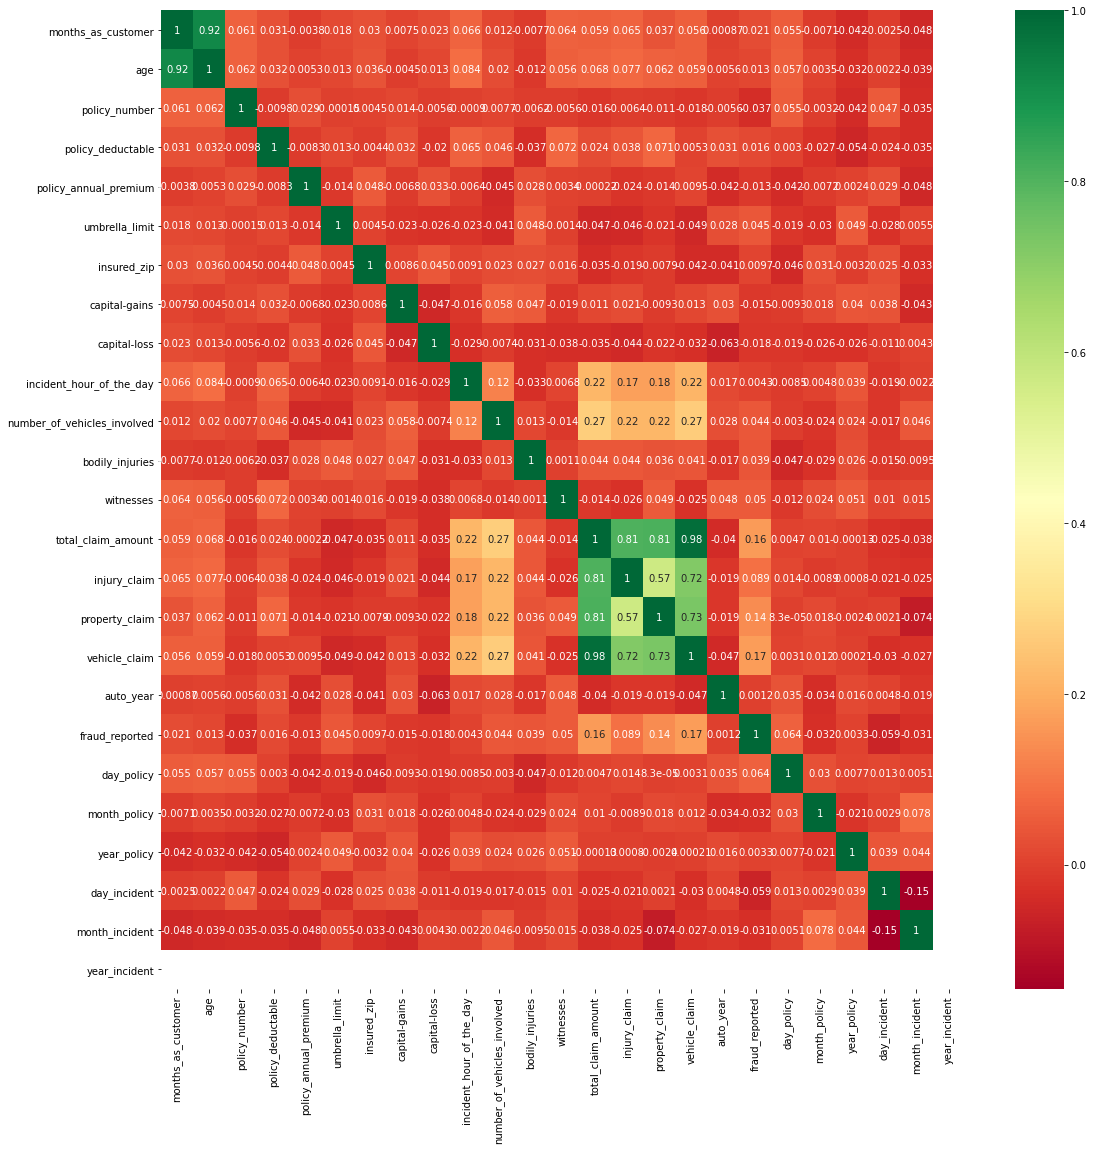

In [134]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

1.total claim amount and vehicle claim has high multicollinearity

2.month as customer and age has high multicollineairity

In [135]:
#vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num.columns
vif

,quality,feature
0,1.021857,witnesses
1,6.854794,age
2,inf,injury_claim
3,1.067899,incident_hour_of_the_day
4,1.012464,bodily_injuries
5,inf,property_claim
6,1.009130,umbrella_limit
7,inf,vehicle_claim
8,1.010794,capital-loss
9,1.025077,policy_deductable


In [136]:
x

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,day_policy,month_policy,year_policy,day_incident,month_incident,year_incident,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_Unknown variable,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_Front Collision,property_damage_Rear Collision,property_damage_Side Collision,property_damage_Unknown variable,police_report_available_Front Collision,police_report_available_Rear Collision,police_report_available_Side Collision,police_report_available_Unknown variable,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,17,10,2014,25,1,2015,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# PCA

In [137]:
# #standardising the data for PCA

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  5.52496172,   8.17081284,  10.78933563,  12.49873478,
        14.02806578,  15.47745852,  16.91314303,  18.32927163,
        19.73367704,  21.11708471,  22.49070097,  23.85973063,
        25.21061453,  26.55311284,  27.88236139,  29.20681122,
        30.5122357 ,  31.75840799,  32.92491483,  34.01615887,
        35.09085506,  36.12808847,  37.15461034,  38.16489717,
        39.16063331,  40.1467482 ,  41.12436149,  42.08805566,
        43.03683604,  43.9726316 ,  44.90648151,  45.82066753,
        46.71970382,  47.61580148,  48.48812036,  49.35855463,
        50.21129858,  51.06050225,  51.88809364,  52.7109023 ,
        53.52692954,  54.33601195,  55.13932498,  55.9374544 ,
        56.7149453 ,  57.48864822,  58.25592964,  59.02309787,
        59.78317678,  60.53836038,  61.28261408,  62.01676407,
        62.73853773,  63.45635816,  64.16912846,  64.87222886,
        65.56676221,  66.25770613,  66.94275783,  67.62122691,
        68.29304041,  68.96100337,  69.62550054,  70.28

In [138]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  111


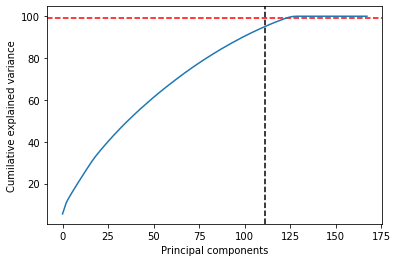

In [139]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [140]:
# Creating final dataset with 111 columns

FinalPCA=PCA(n_components=111)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,-1.484276,-1.857023,-2.391704,0.837868,3.095195,-1.229272,1.071136,-2.238786,-1.926136,-0.856760,-0.569759,-1.084956,-1.027687,-0.224405,0.832516,-1.601688,-0.403546,2.800042,-0.231243,-0.274021,-3.680635,0.387546,0.054300,1.098163,-2.141842,-1.511513,-1.098914,0.964012,-0.971659,-0.952663,0.245226,-0.185893,-0.033622,1.843477,-0.449347,-0.558810,-0.276844,-0.320410,-0.009170,0.226683,0.476886,1.072312,-0.224556,-0.339022,-0.428165,0.453299,0.480840,-1.581246,0.116809,-3.303959,0.251450,0.773310,1.746339,0.983500,-1.320195,1.100365,0.633649,-0.297790,-0.054456,-0.488503,-0.696351,0.306247,0.284087,0.926096,-1.050521,2.422533,-0.677860,-0.442343,-0.955433,1.238701,-1.522557,0.171129,-0.789340,0.194216,-0.822357,0.939553,1.847504,-0.776959,-0.877108,0.204349,0.592045,-1.429310,-0.102358,-0.711044,-0.406211,0.181472,-1.399354,1.777049,-0.674238,-0.182998,-0.067518,-0.020725,0.138055,-0.681909,1.081458,1.809607,-0.084507,-0.369774,0.080444,-0.386105,-0.696809,0.650910,-0.323224,-0.198395,1.959711,0.200811,0.786050,-0.947417,-1.010274,-0.009413,-0.643889
1,5.839163,-0.078388,0.281150,0.837144,4.072169,0.445510,-0.151934,1.402333,1.206527,-0.279636,1.110789,2.329847,0.301432,0.689239,-0.130746,-0.370062,-0.315776,-0.664131,-0.898634,-1.560339,0.027401,0.298834,-1.215297,-1.311149,3.101597,1.053228,-0.653247,-1.039665,-0.080670,2.087991,0.968836,0.834194,0.542363,-0.581718,0.606089,-2.349780,-0.480419,-2.357439,0.124656,-0.975953,0.629339,-0.880857,0.921377,0.104375,0.306910,-1.105911,1.376522,0.848663,-0.495054,-1.232201,-0.236959,0.012818,-0.010943,-0.441187,-0.194513,1.236137,0.193162,-0.325207,-0.579006,-0.523976,0.688400,-0.017549,-1.814230,0.198147,0.386898,1.853610,-1.246309,1.197369,-0.973303,0.683158,-1.730704,-0.384382,-1.135188,-0.797378,-1.178120,-1.112124,-0.937242,-1.394920,0.446758,1.051195,1.438848,-0.440591,0.724659,-1.192337,0.093344,-0.473667,-0.559325,1.686676,-0.114755,-0.004908,-0.677067,0.986990,0.745176,0.300437,-0.435059,0.065628,-1.029641,0.103627,-0.934131,-1.152595,1.949565,-0.872371,-0.407885,0.600257,0.020117,1.765528,1.563563,-0.587349,2.673816,0.873755,-0.816303
2,-0.182654,3.324703,-0.280280,-2.010389,-0.464004,0.306499,0.366226,1.042905,2.936583,-1.138615,-2.061269,-1.695787,0.126709,-0.514678,0.796885,-0.957826,1.795819,-1.208041,1.483045,-2.028914,-0.018346,0.363588,-0.226173,0.322765,-1.093219,1.224600,-0.391154,-1.097516,1.577042,-0.184128,-1.908804,-0.214596,0.536531,1.226171,-2.645784,-0.880237,0.536581,-0.158225,-0.660079,-0.139402,1.785616,1.779365,1.037250,0.652486,-1.048396,-0.098696,-0.046056,0.219994,1.353608,0.062113,-1.187527,0.517179,0.502618,-1.670126,0.730383,-0.192760,-0.885589,1.105828,-0.286097,-1.040624,1.936928,-0.736768,-0.928482,1.312756,0.263813,1.246894,0.504792,-1.300439,0.693797,-0.097458,0.706749,0.303431,-0.448378,0.404868,0.291943,0.657866,0.031336,0.796975,-0.438902,-0.799955,-0.589952,0.205518,-0.404602,-0.686200,-0.052246,2.063517,-0.319118,0.098034,0.532675,0.047764,-0.125857,-0.359251,-0.238646,0.618866,-0.200974,-0.404644,-0.048020,-0.403269,-1.233309,0.622824,0.017032,1.360290,-1.360277,0.507460,-1.513448,0.446811,-0.309011,0.191037,-0.492912,0.427101,-0.563963
3,-0.720332,-0.428072,3.223593,1.304109,-0.445000,2.854757,-1.335353,0.030719,-2.347471,-0.723995,-2.203466,-0.755942,1.565787,0.843684,2.266775,3.766358,1.465681,0.973417,-0.148562,-2.193998,-2.534547,-0.350597,0.161821,1.980309,1.129449,1.322934,-2.880315,-1.251323,-0.256762,-0.371046,-1.218812,-1.551962,-1.122073,0.076030,-0.297232,0.391073,0.340880,-1.812143,-0.967337,-1.585314,0.831251,0.636074,2.600816,-2.414965,1.316453,-0.004869,-1.120639,0.479523,0.522549,-2.003772,0

In [141]:
x=FinalData2

# Splitting data

In [142]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

from imblearn.over_sampling import SMOTE

counter=Counter(y_train)
print('Before',counter)

#oversampling the train dataset using smote
smt=SMOTE()

#X_train,y_train
x_train,y_train_sm=smt.fit_resample(x_train,y_train)

counter=Counter(y_train_sm)

print('After',counter)

In [144]:
y_train.head()

750    N
292    Y
615    N
344    Y
121    Y
Name: fraud_reported, dtype: object

In [145]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8612244897959184 on Random State 39


In [146]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the label  column
y=lab_enc.fit_transform(df['fraud_reported'])

x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=39)

#SMOTE Sampling
from imblearn.over_sampling import SMOTE

counter=Counter(y_train)
print('Before',counter)

#oversampling the train dataset using smote
smt=SMOTE()

#X_train,y_train
x_train,y_train=smt.fit_resample(x_train,y_train)

counter=Counter(y_train)

print('After',counter)

# Modelling

In [149]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8612244897959184
[[179   8]
 [ 26  32]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       187
           1       0.80      0.55      0.65        58

    accuracy                           0.86       245
   macro avg       0.84      0.75      0.78       245
weighted avg       0.86      0.86      0.85       245



In [150]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.673469387755102
[[143  44]
 [ 36  22]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       187
           1       0.33      0.38      0.35        58

    accuracy                           0.67       245
   macro avg       0.57      0.57      0.57       245
weighted avg       0.69      0.67      0.68       245



In [151]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7673469387755102
[[187   0]
 [ 57   1]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       187
           1       1.00      0.02      0.03        58

    accuracy                           0.77       245
   macro avg       0.88      0.51      0.45       245
weighted avg       0.82      0.77      0.67       245



In [152]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7959183673469388
[[184   3]
 [ 47  11]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       187
           1       0.79      0.19      0.31        58

    accuracy                           0.80       245
   macro avg       0.79      0.59      0.59       245
weighted avg       0.79      0.80      0.74       245



In [153]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8102040816326529
Cross validation score of Decision Tree model : 0.6846938775510203
Cross validation score of Random Forest model : 0.7581632653061224
Cross validation score of SVC model : 0.7765306122448979


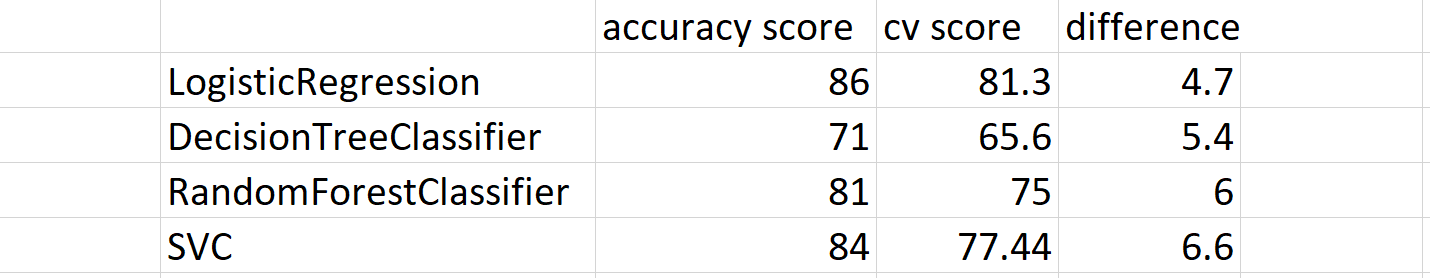

# ROC AUC curve

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("Logistic regression score is: ",lr.score(x_test,y_test))
print("Decision tree score is ",dt.score(x_test,y_test))
print("Random forest score is",rf.score(x_test,y_test))
print("K-neighbour score is",kn.score(x_test,y_test))

Logistic regression score is:  0.8612244897959184
Decision tree score is  0.6938775510204082
Random forest score is 0.763265306122449
K-neighbour score is 0.7142857142857143


In [155]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.5059468928637285

In [156]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7544716946339665

In [157]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5035957956850452

In [158]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.5794302046837543

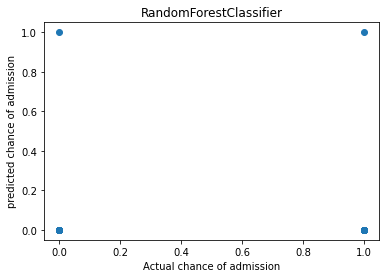

In [159]:
plt.scatter(y_test,rf.predict(x_test))
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('RandomForestClassifier')
plt.show()

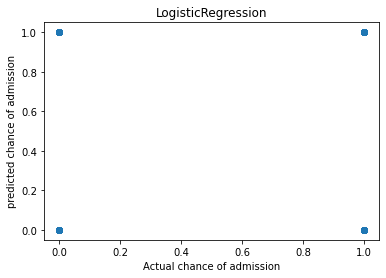

In [160]:
plt.scatter(y_test,lr.predict(x_test))
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('LogisticRegression')
plt.show()

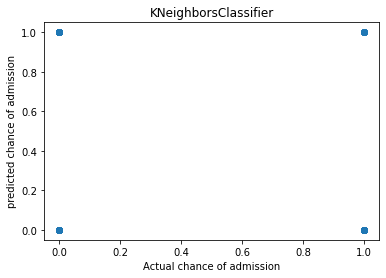

In [161]:
plt.scatter(y_test,kn.predict(x_test))
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('KNeighborsClassifier')
plt.show()

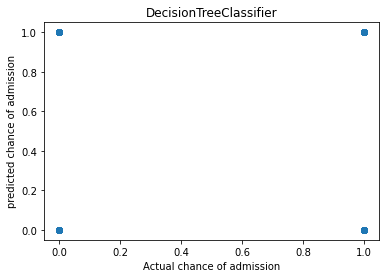

In [162]:
plt.scatter(y_test,dt.predict(x_test))
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('DecisionTreeClassifier')
plt.show()

# Reason for choosing Logistic regression model

1.Least difference is present between the accuracy score and cv score

2.The ROC-AUC score is higher for logistic regression

# Hyperparameter tuning

In [163]:
#from sklearn.linear_model import LogisticRegression

#Logistic Regression
paramters={'penalty':['l1', 'l2','elasticnet','none'],
           'dual':[True,False],
           'tol':[0.75,1],
           'C':[2,3,4,7],
           'intercept_scaling':[1.2,2.1],
           'class_weight':['dict','balanced'],
           'random_state':[2,3],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           }


GCV=GridSearchCV(LogisticRegression(),paramters,cv=6)

GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 7],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'intercept_scaling': [1.2, 2.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [2, 3],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.75, 1]})

In [164]:
GCV.best_params_

{'C': 3,
 'class_weight': 'balanced',
 'dual': False,
 'intercept_scaling': 1.2,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'liblinear',
 'tol': 1}

In [165]:
mod=LogisticRegression(random_state=2,C=2,dual=False,intercept_scaling=2.1,penalty='l2',tol=0.75,class_weight='balanced',solver='liblinear')

In [166]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.44897959183673


In [167]:
regression=LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression()

# Saving of model

In [168]:
#saving LogisticRegression model
LogisticRegression_tree_model=LogisticRegression()
LogisticRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LogisticRegression_tree_model,open(filename,'wb'))

In [169]:
y_pred=regression.predict(x_test)

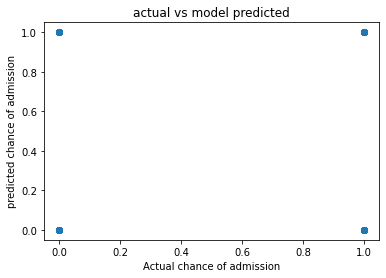

In [170]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [171]:
scr=cross_val_score(regression,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8102040816326529


In [172]:
regression.fit(x_train,y_train)
pred=regression.predict(x_test)
print("accuracy score of the Logistic Regression model is",accuracy_score(y_test,pred)*100)

accuracy score of the Logistic Regression model is 86.12244897959184


In [173]:
regression.fit(x_train,y_train)
print("ROC AUC Score of the logistic regression model is",roc_auc_score(y_test,regression.predict(x_test)))

ROC AUC Score of the logistic regression model is 0.7544716946339665


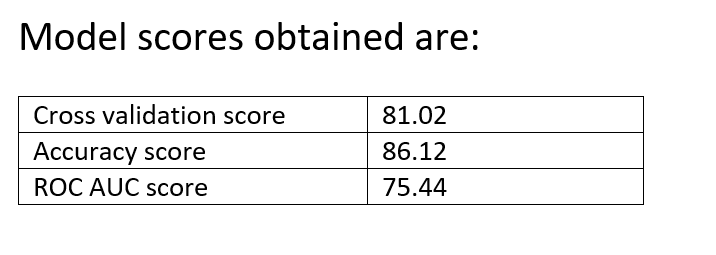

In [174]:
#model created
regression.fit(x_train,y_train)
predlr=regression.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8612244897959184
[[179   8]
 [ 26  32]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       187
           1       0.80      0.55      0.65        58

    accuracy                           0.86       245
   macro avg       0.84      0.75      0.78       245
weighted avg       0.86      0.86      0.85       245



0 is Not fraud

1 is Fraud